# Logistic Regression - Toxic Comments Classification

## Objetivo
Implementar y evaluar un modelo de regresión logística para clasificar comentarios tóxicos.

In [1]:
# === 1. Import libraries and basic configuration ============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
import os

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# -----------------------------
# 2. Load preprocessed dataset
# -----------------------------
data_path = "../../data/preprocessing_data/youtoxic_english_1000_clean.csv"
df = pd.read_csv(data_path)

print(f"✅ Dataset cargado: {len(df)} filas, {len(df.columns)} columnas")
print(f"📊 Columnas disponibles: {list(df.columns)}")
print(f"📊 Distribución target: \n{df['IsToxic'].value_counts()}")

# Verificar datos faltantes
print(f"\n📊 Datos faltantes:")
print(df.isnull().sum())

# Mostrar muestra de datos
print(f"\n📝 Muestra de datos:")
df.head()

✅ Dataset cargado: 997 filas, 18 columnas
📊 Columnas disponibles: ['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsReligiousHate', 'text_basic', 'text_classic', 'text_len_classic', 'word_count_classic', 'uppercase_ratio', 'exclamation_count', 'hate_words_count']
📊 Distribución target: 
IsToxic
False    538
True     459
Name: count, dtype: int64

📊 Datos faltantes:
CommentId             0
VideoId               0
Text                  0
IsToxic               0
IsAbusive             0
IsThreat              0
IsProvocative         0
IsObscene             0
IsHatespeech          0
IsRacist              0
IsReligiousHate       0
text_basic            0
text_classic          0
text_len_classic      0
word_count_classic    0
uppercase_ratio       0
exclamation_count     0
hate_words_count      0
dtype: int64

📝 Muestra de datos:


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsReligiousHate,text_basic,text_classic,text_len_classic,word_count_classic,uppercase_ratio,exclamation_count,hate_words_count
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,If only people would just take a step back and...,people would take step back make case wasnt an...,850,129,0.014121,0,2
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,Law enforcement is not trained to shoot to app...,law enforcement trained shoot apprehend traine...,90,13,0.036232,0,3
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,True,True,False,False,True,False,False,False,Dont you reckon them 'black lives matter' bann...,dont reckon black life matter banner held whit...,252,40,0.002375,0,1
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,There are a very large number of people who do...,large number people like police officer called...,339,49,0.015464,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,"The Arab dude is absolutely right, he should h...",arab dude absolutely right shot extra time sho...,138,23,0.020576,0,1


In [3]:
# -----------------------------
# 3. Prepare features and target
# -----------------------------
# Target y features
text_col = "text_classic"
num_features = [
    "text_len_classic",
    "word_count_classic", 
    "uppercase_ratio",
    "exclamation_count",
    "hate_words_count"
]

# Verificar que todas las columnas existen
missing_cols = [col for col in [text_col] + num_features if col not in df.columns]
if missing_cols:
    print(f"❌ Columnas faltantes: {missing_cols}")
    print(f"📊 Columnas disponibles: {list(df.columns)}")
else:
    print("✅ Todas las columnas necesarias están disponibles")

# Preparar X e y
X = df[[text_col] + num_features]
y = df["IsToxic"]

print(f"\n📊 Forma de X: {X.shape}")
print(f"📊 Forma de y: {y.shape}")
print(f"📊 Distribución de y: {y.value_counts(normalize=True)}")

✅ Todas las columnas necesarias están disponibles

📊 Forma de X: (997, 6)
📊 Forma de y: (997,)
📊 Distribución de y: IsToxic
False    0.539619
True     0.460381
Name: proportion, dtype: float64


In [6]:
# -----------------------------
# 2. Train/Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# -----------------------------
# 3. Build pipeline
# -----------------------------
preprocessor = ColumnTransformer(
transformers=[
("tfidf", TfidfVectorizer(), text_col),
("num", "passthrough", num_features)
]
)


model = Pipeline([
("preprocess", preprocessor),
("clf", LogisticRegression(max_iter=300))
])

In [8]:
# -----------------------------
# 4. Train model
# -----------------------------
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('tfidf', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
# -----------------------------
# 5. Predictions and metrics
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


metrics = {
"accuracy": accuracy_score(y_test, y_pred),
"precision": precision_score(y_test, y_pred),
"recall": recall_score(y_test, y_pred),
"f1": f1_score(y_test, y_pred),
"roc_auc": roc_auc_score(y_test, y_prob)
}

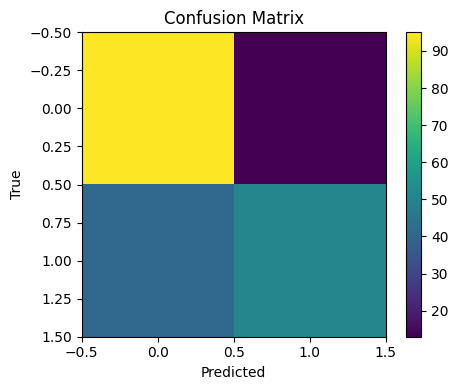

In [10]:
# -----------------------------
# 6. Confusion Matrix Plot
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

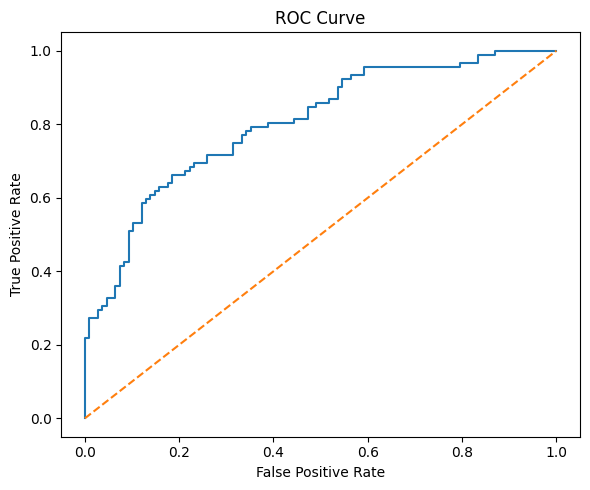

In [11]:
# -----------------------------
# 7. ROC Curve
# -----------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.tight_layout()
plt.show()

In [12]:
# -----------------------------
# 8. Save model
# -----------------------------
os.makedirs("backend/models", exist_ok=True)
model_path = "backend/models/logistic_regression.pkl"
joblib.dump(model, model_path)

['backend/models/logistic_regression.pkl']

In [ ]:
# -----------------------------
# 9. Save metrics JSON
# -----------------------------
from pathlib import Path
from datetime import datetime
import os

# Usar ruta absoluta basada en el directorio actual
current_dir = Path(os.getcwd())
print(f"📁 Directorio actual: {current_dir}")

# Navegar hacia la raíz del proyecto (desde notebooks hacia proyecto)
if "notebooks" in str(current_dir):
    project_root = current_dir.parent.parent  # backend/notebooks -> backend -> proyecto
else:
    project_root = current_dir

print(f"📁 Raíz del proyecto: {project_root}")

model_name = "logistic_regression"
target_col = "IsToxic"
random_state = 42

# Directories for models and results
models_dir = project_root / "backend" / "models"
results_dir = project_root / "data" / "results"

print(f"📁 Directorio modelos: {models_dir}")
print(f"📁 Directorio resultados: {results_dir}")

# Crear directorios si no existen
models_dir.mkdir(parents=True, exist_ok=True)
results_dir.mkdir(parents=True, exist_ok=True)
print("✅ Directorios creados/verificados")

# Get feature counts from trained model
text_vectorizer = model.named_steps["preprocess"].named_transformers_["tfidf"]
n_features_text = len(text_vectorizer.get_feature_names_out())
n_features_numeric = len(num_features)
n_samples = len(df)

# Calculate confusion matrix components
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

results_dict = {
    "model_name": model_name,
    "task": "binary_classification",
    "target_label": target_col,
    "data": {
        "n_samples": int(n_samples),
        "n_features_text": int(n_features_text),
        "n_features_numeric": int(n_features_numeric),
        "train_size": float(len(X_train) / n_samples),
        "test_size": float(len(X_test) / n_samples),
        "random_state": int(random_state),
    },
    "metrics": {
        "accuracy": float(metrics["accuracy"]),
        "precision": float(metrics["precision"]),
        "recall": float(metrics["recall"]),
        "f1": float(metrics["f1"]),
        "roc_auc": float(metrics["roc_auc"]),
    },
    "confusion_matrix": {
        "tn": int(tn),
        "fp": int(fp),
        "fn": int(fn),
        "tp": int(tp),
    },
    "timestamp": datetime.now().isoformat(timespec="seconds"),
    "notes": "Logistic Regression; TF-IDF + numeric features; max_iter=300",
}

# Paths for saving JSON and model
json_path = results_dir / f"{model_name}.json"
model_path = models_dir / f"{model_name}.pkl"

print(f"📄 Ruta JSON completa: {json_path}")
print(f"🧠 Ruta modelo completa: {model_path}")

# Save JSON with error handling
try:
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(results_dict, f, indent=2, ensure_ascii=False)
    print("✅ JSON guardado exitosamente")
except Exception as e:
    print(f"❌ Error guardando JSON: {e}")

# Save model with error handling
try:
    joblib.dump(model, model_path)
    print("✅ Modelo guardado exitosamente")
except Exception as e:
    print(f"❌ Error guardando modelo: {e}")

# Verificar que los archivos existen
if json_path.exists():
    print(f"✅ JSON verificado en: {json_path}")
    print(f"   Tamaño: {json_path.stat().st_size} bytes")
else:
    print(f"❌ JSON no encontrado en: {json_path}")

if model_path.exists():
    print(f"✅ Modelo verificado en: {model_path}")
    print(f"   Tamaño: {model_path.stat().st_size} bytes")
else:
    print(f"❌ Modelo no encontrado en: {model_path}")

print("=" * 80)
print("💾 PROCESO DE GUARDADO COMPLETADO")
print("=" * 80)
print(f"\n📊 Métricas finales:")
for metric, value in metrics.items():
    print(f"   {metric}: {value:.4f}")

💾 GUARDADO COMPLETADO
🧠 Modelo guardado en: backend\models\logistic_regression.pkl
📄 Resultados JSON en: data\results\logistic_regression.json

📊 Métricas finales:
   accuracy: 0.7300
   precision: 0.7969
   recall: 0.5543
   f1: 0.6538
   roc_auc: 0.8034

✅ JSON sigue la estructura estándar para comparación de modelos.
